# Video Lesson \#16

## Part 3: String formatting

In [1]:
# Import statements
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
T = 10.71717
RH = 52.517985

# option 1:
print('Temperature = {}˚C, Relative humidity= {}%'.format(T, RH))
# option 2 (better!):
print('Temperature = {T}˚C, Relative humidity= {RH}%'.format(RH=RH, T=T))

# round to two decimal places
print('Temperature = {T:.2f}˚C, Relative humidity= {RH:.4f}%'.format(RH=RH, T=T))

Temperature = 10.71717˚C, Relative humidity= 52.517985%
Temperature = 10.71717˚C, Relative humidity= 52.517985%
Temperature = 10.72˚C, Relative humidity= 52.5180%


In [3]:
# Additional customization of outputs
"""
What the different components of the line below indicate:
     0  : placeholder for the position of the input
          (only one input here, so the position is 0)
     <  : Align the input on the left side of the string
          (extra spaces will be on the right)
     6  : Output 6 characters total
    .3  : Round the input to 3 decimal places
     f  : The input is a float 

"""
'{0:<6.3f}'.format(3.141592653589)

'3.142 '

In [4]:
# Old method: write out each filename individually:
# filenames = ['D5901105_185.nc','D5901105_186.nc','D5901105_187.nc',
#              'D5901105_188.nc','D5901105_189.nc','D5901105_190.nc']

# New method: Use string formatting to append filenames to a list
filenames = []
for index in range(185, 191):
    floatstring = 'D5901105_{:03d}.nc'.format(index)
    filenames.append(floatstring)

print(filenames)

['D5901105_185.nc', 'D5901105_186.nc', 'D5901105_187.nc', 'D5901105_188.nc', 'D5901105_189.nc', 'D5901105_190.nc']


In [5]:
# define a function to read an ARGO float profile based
# on the float number and profile number
def read_profile(floatnum, profnum, filepath):
    """
    Parameters:
        floatnum (int): ARGO float identifier
        profnum (int): ARGO profile number
        filepath (str): path to directory where files are stored
    """
    # construct a file name using the given float number and profile number
    profstring = 'D{0:d}_{1:03d}.nc'.format(floatnum, profnum)
    print(profstring)
    data = xr.open_dataset(filepath+profstring)
    data = data.squeeze()
    return data

filepath = 'ARGO_floatdata/'
data = read_profile(5901105, 186, filepath)
display(data)

D5901105_186.nc


<xarray.Dataset>
Dimensions:                       (N_PARAM: 4, N_LEVELS: 76, N_HISTORY: 4)
Dimensions without coordinates: N_PARAM, N_LEVELS, N_HISTORY
Data variables: (12/70)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY) object ...
    HISTORY_PARAMETER             (N_HISTORY) object ...
    HISTORY_START_PRES            (N_HISTORY) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY) float32 ...
    HISTORY_QCTEST                (N_HISTORY) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2019-02-26T17:55:57Z creation
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.2
    Conventions:          Argo-3.2 CF-1.6
    featureType:          trajectoryProfile

###  Adding math symbols to strings on figures

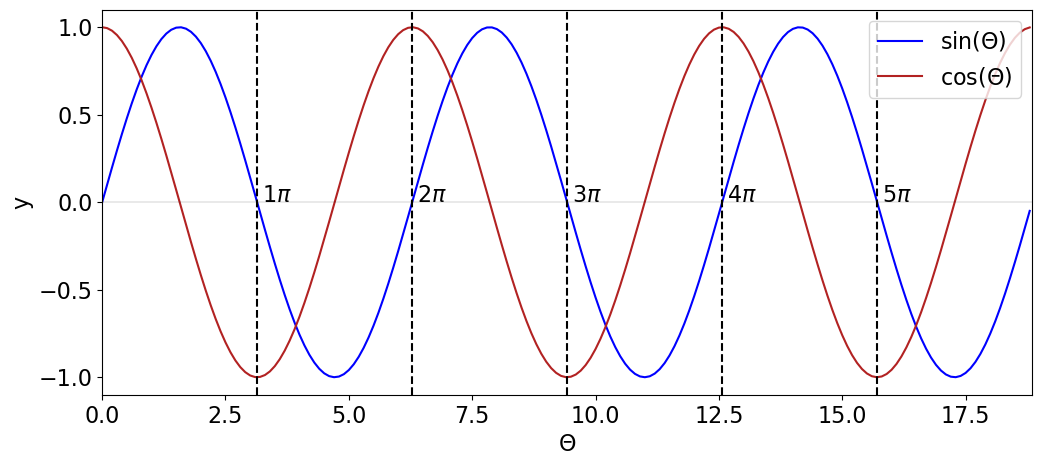

In [6]:
theta = np.arange(0, 6*np.pi, 0.1)
y1 = np.sin(theta)
y2 = np.cos(theta)

# fontsize variable to easily change fontsizes 
fs = 16 

# make a plot
fig = plt.figure(figsize=(12, 5))

# plot sin(θ) and cos(θ) with formatted labels
plt.plot(theta, y1, 'b', label='sin($\Theta$)')
plt.plot(theta, y2, c='firebrick', label='cos($\Theta$)')

# add horizontal line at y=0
plt.plot([0, 6*np.pi], [0, 0], 'k-', lw=0.25, alpha=0.5)

for index in range(1, 6):
    # add vertical dashed lines at multiples of pi 
    plt.plot([index*np.pi, index*np.pi], [-1.1, 1.1], 'k--')
    # add 1π, 2π, etc. annotations
    plt.text(index*np.pi + 0.1, 0, '{}$\pi$'.format(index), fontsize=fs)

# set axis limits and labels
plt.xlim([0, 6 * np.pi])
plt.ylim([-1.1, 1.1])
plt.xlabel('$\Theta$', fontsize=fs)
plt.ylabel('y', fontsize=fs)
plt.tick_params(axis='both', labelsize=fs) # increase tick fontsizes

# add a legend
plt.legend(fontsize=fs)


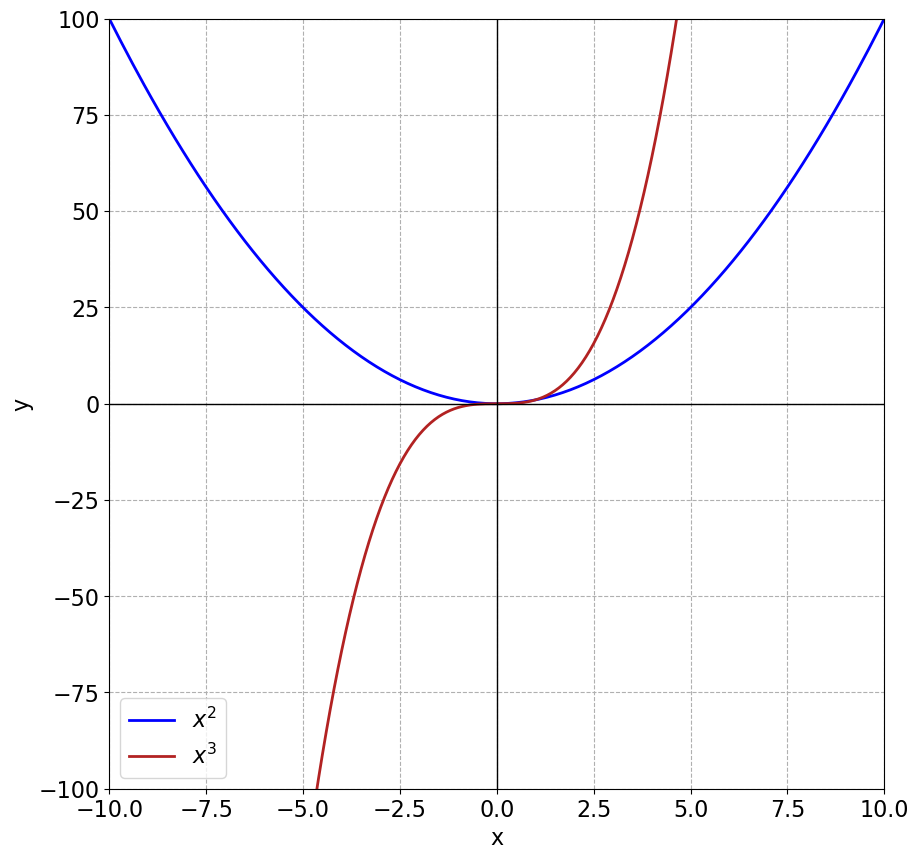

In [7]:
x = np.arange(-10, 11, 0.1)
y1 = x**2
y2 = x**3

# fontsize variable to easily change fontsizes 
fs = 16

# make a plot
fig = plt.figure(figsize=(10,10))

# plot x^2 and x^3
plt.plot(x, y1, 'b', lw=2, label='$x^2$')
plt.plot(x, y2, c='firebrick', lw=2, label='$x^3$')

# add axis lines at x=0 and y=0
plt.plot([-10, 10], [0, 0], 'k-', lw=1)
plt.plot([0, 0], [-100, 100], 'k-', lw=1)

# set axis limits and labels
plt.ylim([-100, 100])
plt.xlim([-10, 10])
plt.tick_params(axis='both', labelsize=fs) # increase tick fontsizes
plt.xlabel('x', fontsize=fs)
plt.ylabel('y', fontsize=fs)
plt.legend(fontsize=fs)
plt.grid(ls='--')

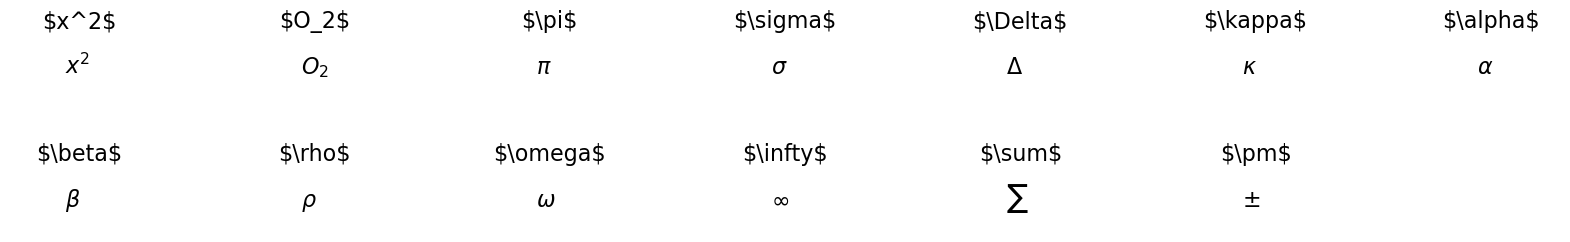

In [8]:
# List of LaTeX formatted strings to display
strings = ['$x^2$', 
           '$O_2$', 
           '$\pi$', 
           '$\sigma$', 
           '$\Delta$',
           '$\kappa$', 
           '$\\alpha$', 
           '$\\beta$', 
           '$\\rho$', 
           '$\omega$',
           '$\infty$', 
           '$\sum$', 
           '$\pm$']

# fontsize variable to easily change fontsizes 
fs = 16

fig = plt.figure(figsize=(20,2))
for index in range(0,13):
    ax = fig.add_subplot(2, 7, index+1)
    plt.text(0.4, 0.4, strings[index], fontsize=fs)
    plt.title('\\' + strings[index], fontsize=fs)
    plt.axis('off')

# adjust the spacing between subplots
plt.subplots_adjust(top = 0.99, 
                    bottom=0.01, 
                    hspace=1.1, # add extra white space between rows
                    wspace=0.7)